<a href="https://colab.research.google.com/github/SSRavipati/LLM-course/blob/main/chapter_2/behind_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [4]:
import transformers

PIPELINE is a function in transformers, that has a pre processor, model, and post processor


In [5]:
from transformers import pipeline

In [7]:
classifier = pipeline("sentiment-analysis")
classifier(["EU countries push for swift trade with trump",
            "Gold prices are falling"])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


[{'label': 'NEGATIVE', 'score': 0.5303354859352112},
 {'label': 'NEGATIVE', 'score': 0.9995725750923157}]

**BEHIND THE PIPELINE**

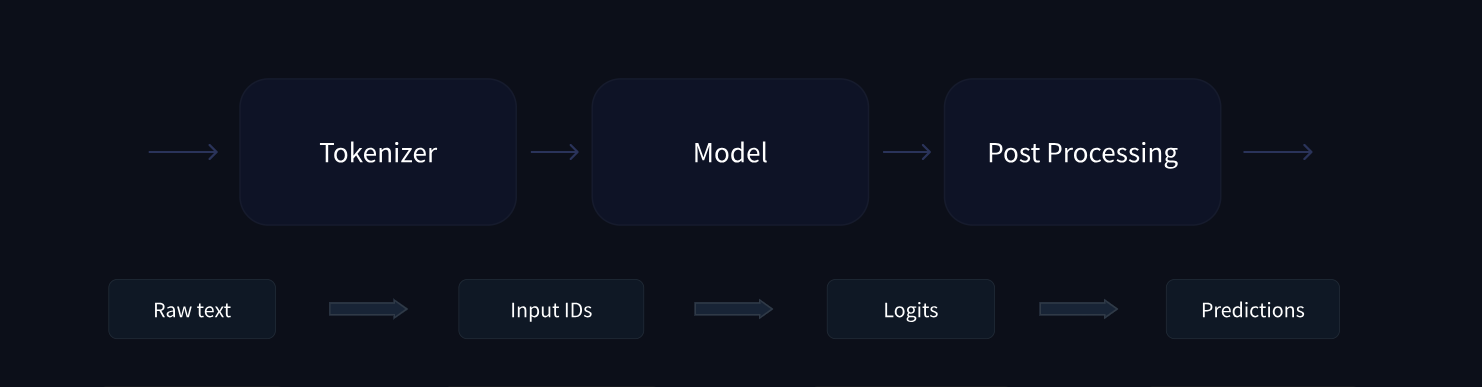



*   preprocessing needs to be done in exactly the same way as when the model was pretrained
*   To do this, we use the AutoTokenizer class and its from_pretrained() method
*   Using the checkpoint name of our model, it will automatically fetch the data associated with the model’s tokenizer and cache i



In [8]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [9]:
raw_inputs = [
    "You are master of your soul ",
    "Captain of your life"
]
inputs = tokenizer(raw_inputs, padding = True, truncation = True, return_tensors = "pt")
print(inputs)

{'input_ids': tensor([[ 101, 2017, 2024, 3040, 1997, 2115, 3969,  102],
        [ 101, 2952, 1997, 2115, 2166,  102,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0]])}


to download a pretrained method Transformers provides an AutoModel class which also has a from_pretrained() method

In [10]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

This architecture contains only the base Transformer module:
--given some inputs, it outputs what we’ll call hidden states, also known as features. For each model input, we’ll retrieve a high-dimensional vector representing the contextual understanding of that input by the Transformer model.
A high-dimensional vector?
The vector output by the Transformer module is usually large. It generally has three dimensions:

Batch size: The number of sequences processed at a time (2 in our example).
Sequence length: The length of the numerical representation of the sequence (16 in our example).
Hidden size: The vector dimension of each model input.

While these hidden states can be useful on their own, they’re usually inputs to another part of the model, known as the head. The different tasks could have been performed with the same architecture, but each of these tasks will have a different head associated with it.

In [11]:
output = model(**inputs)
print(output.last_hidden_state.shape)

torch.Size([2, 8, 768])


The output of the Transformer model is sent directly to the model head to be processed.

In [12]:
from transformers import AutoModelForSequenceClassification
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

In [13]:
print(outputs.logits.shape)
print(outputs.logits)

torch.Size([2, 2])
tensor([[-4.3677,  4.7108],
        [-3.7869,  3.9510]], grad_fn=<AddmmBackward0>)


In [14]:
import torch

In [16]:
predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
print(predictions)

tensor([[1.1408e-04, 9.9989e-01],
        [4.3578e-04, 9.9956e-01]], grad_fn=<SoftmaxBackward0>)


In [17]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

Now we can conclude that the model predicted the following:

First sentence: NEGATIVE: 0.0402, POSITIVE: 0.9598
Second sentence: NEGATIVE: 0.9995, POSITIVE: 0.0005